<h1>Assignments

<h2>KMeans Clustering Assignment(Sub Optimal)

<h4>You work in XYZ Company as a Python. The company officials want you to write code for a clustering
problem.

Dataset: customers.csv
    
Tasks to be performed:
    
1. K-Means Clustering:
- Load customer data.
- Check the number of cells in each column with null values.
- Create a scatter plot with Age as X and Spending Score as Y.
- Draw a scatter plot displaying data points colored on the basis of clusters.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

%matplotlib inline

In [2]:
customer = pd.read_csv("customers.csv")

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer["Gender"] = customer["Gender"].apply(lambda x : 1 if x == "Male" else 0)

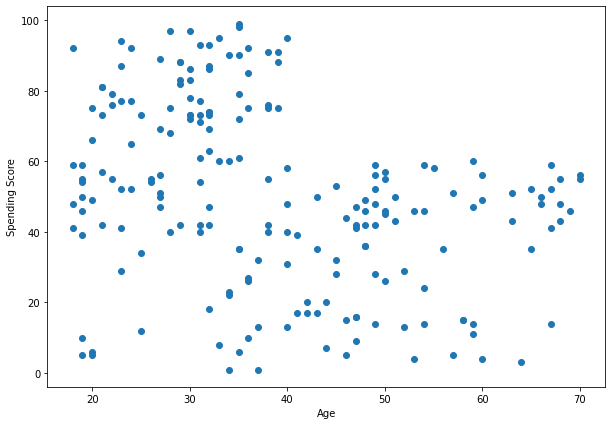

In [6]:
fig = plt.figure(figsize=(10,7))
x = customer["Age"]
y = customer["Spending Score (1-100)"]
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.scatter(x,y)
plt.show()

<h2>Using only python

In [7]:
X = np.array(list(zip(x,y)))

In [8]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [9]:
k = 3

Cx = np.random.randint(0, np.max(X), size= k)

Cy = np.random.randint(0, np.max(X), size= k)

In [10]:
C = np.array(list(zip(Cx, Cy)), dtype=np.float32)

In [11]:
print(C)

[[15.  8.]
 [ 5. 62.]
 [56. 20.]]


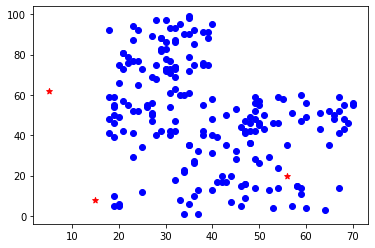

In [12]:
plt.scatter(x,y, c="blue")
plt.scatter(Cx,Cy, marker="*", c="red")
plt.show()

Text(0, 0.5, 'Spending score')

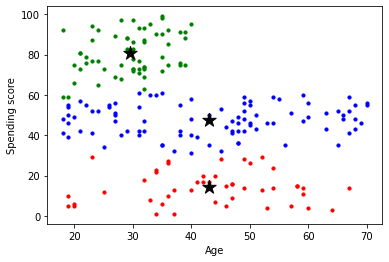

In [13]:
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))

error = dist(C, C_old, None)

while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = copy.deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in  range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C,C_old,None)
colors = ['r','g','b','y','c','m']

fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:,0], points[:,1], s =10, c=colors[i])
ax.scatter(C[:,0], C[:,1], marker="*", s = 200, c="#050505")
plt.xlabel("Age")
plt.ylabel("Spending score")

<h2>Kmeans function

In [14]:
kmeans = KMeans(n_clusters = 3, init='k-means++')

In [15]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
y = kmeans.predict(X)

In [17]:
y

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [18]:
y=y.reshape(200,1)

In [19]:
y.shape

(200, 1)

In [20]:
df = np.hstack((X, y))

In [21]:
df.shape

(200, 3)

In [22]:
columns = ["Age", "Spending Score", "Label"]

In [23]:
df = pd.DataFrame(data= df, columns=columns)

In [24]:
df.head()

,Age,Spending Score,Label
0,19,39,1
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,1


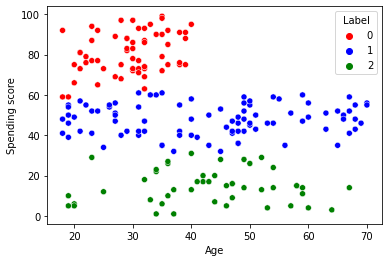

In [25]:
sns.scatterplot(x = df["Age"], y = df["Spending Score"], hue = "Label", palette=["red","blue","green"], data=df)
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

<h2>KMeans Clustering Assignment

<h4>Problem Statement:
    
You work in XYZ Company as a Python Developer. The company officials want you to write code for
a clustering problem.
    
Dataset: customers.csv
    
Tasks to be performed:
    
1. K-Means Clustering:
    
- Load customer data.
    
- Check the number of cells in each column with null values.
    
- Create a scatter plot with Age as X and Spending Score as Y.
    
- Find out the best number for clusters between 1 and 10 (inclusive) using the elbow method.
    
- Draw a scatter plot displaying data points colored on the basis of clusters.

In [26]:
customer = pd.read_csv("customers.csv")

In [27]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
customer.shape

(200, 5)

In [29]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
customer.pop("CustomerID")

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [31]:
X = customer
X.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [32]:
X["Gender"] = X["Gender"].apply(lambda x : 1 if x == "Male" else 0)

In [33]:
X["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [34]:
X.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [35]:
X.mean(axis=0)

Gender                     0.44
Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [36]:
X.std(axis=0)

Gender                     0.497633
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


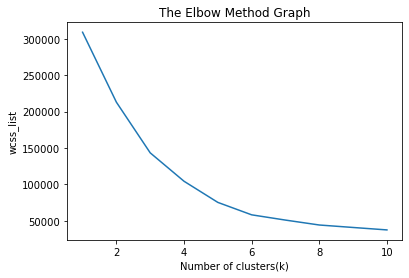

In [37]:
elbow_list= []   
   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)  
    elbow_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), elbow_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter=300, n_init=10, random_state=0) 

In [39]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [40]:
y = kmeans.predict(X)

In [41]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [42]:
x = kmeans.cluster_centers_

In [43]:
x

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [44]:
x[:,2]

array([26.30434783, 86.53846154, 55.29113924, 87.75      , 26.30434783])

In [45]:
X["category"] = y

In [46]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),category
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


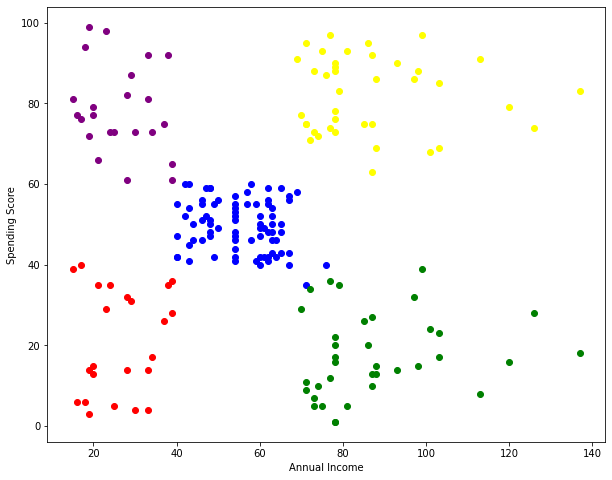

In [47]:
fig = plt.figure(figsize=(10,8))

plt.scatter(X["Annual Income (k$)"][X["category"] == 0],X["Spending Score (1-100)"][X["category"] == 0], c = "red")
plt.scatter(X["Annual Income (k$)"][X["category"] == 1],X["Spending Score (1-100)"][X["category"] == 1], c = "yellow")
plt.scatter(X["Annual Income (k$)"][X["category"] == 2],X["Spending Score (1-100)"][X["category"] == 2], c = "blue")
plt.scatter(X["Annual Income (k$)"][X["category"] == 3],X["Spending Score (1-100)"][X["category"] == 3], c = "green")
plt.scatter(X["Annual Income (k$)"][X["category"] == 4],X["Spending Score (1-100)"][X["category"] == 4], c = "purple")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

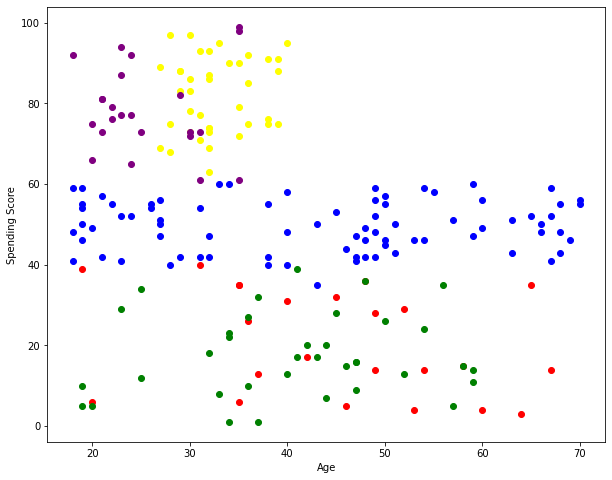

In [48]:
fig = plt.figure(figsize=(10,8))

plt.scatter(X["Age"][X["category"] == 0],X["Spending Score (1-100)"][X["category"] == 0], c = "red")
plt.scatter(X["Age"][X["category"] == 1],X["Spending Score (1-100)"][X["category"] == 1], c = "yellow")
plt.scatter(X["Age"][X["category"] == 2],X["Spending Score (1-100)"][X["category"] == 2], c = "blue")
plt.scatter(X["Age"][X["category"] == 3],X["Spending Score (1-100)"][X["category"] == 3], c = "green")
plt.scatter(X["Age"][X["category"] == 4],X["Spending Score (1-100)"][X["category"] == 4], c = "purple")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

<h2>Agglomerative Clustering Assignment

<h4>Problem Statement:
    
You work in XYZ Company as a Python Developer. The company officials want you to
write code for an Agglomerative Clustering Problem.
    
Tasks to be performed:
    
- Load iris data from load_iris function from sklearn.datasets package.
    
- From the dataset extract the data property.
    
- Train an AgglomerativeClustring model based on the data.
    
- Plot dendrogram to visualize the clustering linkage

In [49]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch

In [50]:
iris = datasets.load_iris()

In [51]:
X = iris.data

In [52]:
y = iris.target

In [53]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [55]:
model = AgglomerativeClustering(n_clusters= 3, affinity="euclidean", linkage='ward')

In [56]:
model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [57]:
y_pred = model.labels_

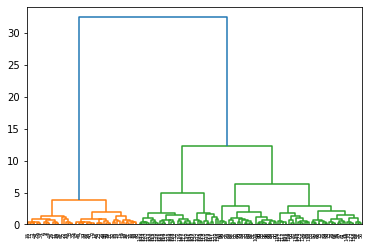

In [58]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [60]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<h2>Dendrogram Assignment

<h4>Problem Statement:
    
You work in XYZ Company as a Python. The company officials want you to write code for a
Agglomerative Clustering Problem.
    
Data:
[[5,3],
[10,15],
[15,12],
[24,10],
[30,30],
[85,70],
[71,80],
[60,78],
[70,55],
[80,91],]
    
Tasks to be performed:
  <ul>  
<li> Using the np.array function create an np array from the data given above.
    
<li>Generate a scatter plot for the data.
    
<li>Plot dendrogram to visualize the clustering linkage


In [61]:
data = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91]])

In [62]:
data.shape

(10, 2)

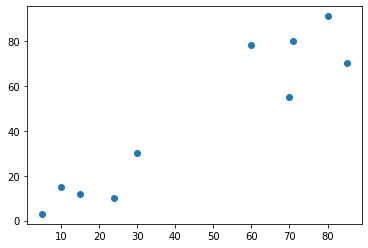

In [63]:
plt.scatter(data[:,0], data[:,1])
plt.show()

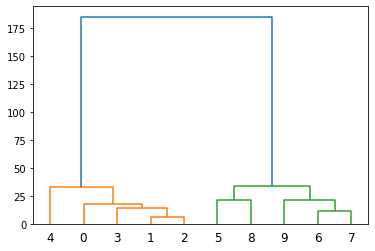

In [64]:
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

<h2>Association Rule Mining Assignment

<h4>Problem Statement:
    
You work in XYZ Company as a Python. The company officials want you to write code for a Association
Rule Mining
    
Dataset: retail_dataset.csv
    
Tasks to be performed:
    
- Using pandas import the dataset as dataframe
    
- Install the mixtend library to use apriory and association rule mining
    
- Using the apriori algorithm generate a list of item frequently brought together.
    
- Generate the association rules for the given items from apriori algorithm
    

In [65]:
retail = pd.read_csv("Retail.csv", header = None)

In [66]:
retail

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Transactions from the Database,NaN,NaN,#Transactions in which\n the item is bought,Support,NaN
2,"1 : { Pencils, Markers, Highlighters, Papers}",NaN,Pencils,2,0.2,NaN
3,"2 : {Markers, Erasers}",NaN,Markers,6,0.6,NaN
4,"3 : {Stapler Pins, Papers, Erasers, Card Holde...",NaN,Highlighters,3,0.3,NaN
5,"4 : {Papers, Erasers, Cad Holders}",NaN,Papers,4,0.4,NaN
6,"5 : {Markers, Post-it, Erasers}",NaN,Erasers,7,0.7,NaN
7,6 : {Envelop},NaN,Stapler Pins,3,0.3,NaN
8,"7 : {Markers, Erasers}",NaN,Card Holders,2,0.2,NaN
9,"8 : {Pencils, Markers, StaplerPins, Post-it, H...",NaN,Post-it,3,0.3,NaN


In [67]:
retail.drop([0], inplace=True)

In [68]:
retail

,0,1,2,3,4,5
1,Transactions from the Database,NaN,NaN,#Transactions in which\n the item is bought,Support,NaN
2,"1 : { Pencils, Markers, Highlighters, Papers}",NaN,Pencils,2,0.2,NaN
3,"2 : {Markers, Erasers}",NaN,Markers,6,0.6,NaN
4,"3 : {Stapler Pins, Papers, Erasers, Card Holde...",NaN,Highlighters,3,0.3,NaN
5,"4 : {Papers, Erasers, Cad Holders}",NaN,Papers,4,0.4,NaN
6,"5 : {Markers, Post-it, Erasers}",NaN,Erasers,7,0.7,NaN
7,6 : {Envelop},NaN,Stapler Pins,3,0.3,NaN
8,"7 : {Markers, Erasers}",NaN,Card Holders,2,0.2,NaN
9,"8 : {Pencils, Markers, StaplerPins, Post-it, H...",NaN,Post-it,3,0.3,NaN
10,"9 : {StaplerPins, Post-it, Markers, Erasers}",NaN,Envelop,2,0.2,NaN


In [69]:
temp = retail.iloc[1:11, 0]
temp

2         1 : { Pencils, Markers, Highlighters, Papers}
3                                2 : {Markers, Erasers}
4     3 : {Stapler Pins, Papers, Erasers, Card Holde...
5                    4 : {Papers, Erasers, Cad Holders}
6                       5 : {Markers, Post-it, Erasers}
7                                         6 : {Envelop}
8                                7 : {Markers, Erasers}
9     8 : {Pencils, Markers, StaplerPins, Post-it, H...
10         9 : {StaplerPins, Post-it, Markers, Erasers}
11                                       10 : {Envelop}
Name: 0, dtype: object

In [70]:
retail = pd.DataFrame(temp)

In [71]:
retail.reset_index(inplace = True)
retail

,index,0
0,2,"1 : { Pencils, Markers, Highlighters, Papers}"
1,3,"2 : {Markers, Erasers}"
2,4,"3 : {Stapler Pins, Papers, Erasers, Card Holde..."
3,5,"4 : {Papers, Erasers, Cad Holders}"
4,6,"5 : {Markers, Post-it, Erasers}"
5,7,6 : {Envelop}
6,8,"7 : {Markers, Erasers}"
7,9,"8 : {Pencils, Markers, StaplerPins, Post-it, H..."
8,10,"9 : {StaplerPins, Post-it, Markers, Erasers}"
9,11,10 : {Envelop}


In [72]:
retail.drop(['index'], axis = 1, inplace=True)

In [73]:
retail

,0
0,"1 : { Pencils, Markers, Highlighters, Papers}"
1,"2 : {Markers, Erasers}"
2,"3 : {Stapler Pins, Papers, Erasers, Card Holde..."
3,"4 : {Papers, Erasers, Cad Holders}"
4,"5 : {Markers, Post-it, Erasers}"
5,6 : {Envelop}
6,"7 : {Markers, Erasers}"
7,"8 : {Pencils, Markers, StaplerPins, Post-it, H..."
8,"9 : {StaplerPins, Post-it, Markers, Erasers}"
9,10 : {Envelop}


In [74]:
retail.iloc[:,0] = retail.iloc[:,0].apply(lambda x : x.split(":")[1].strip()[1:-1].strip())

In [75]:
retail = retail.to_numpy()

In [76]:
retail

array([['Pencils, Markers, Highlighters, Papers'],
       ['Markers, Erasers'],
       ['Stapler Pins, Papers, Erasers, Card Holders, Highlighters'],
       ['Papers, Erasers, Cad Holders'],
       ['Markers, Post-it, Erasers'],
       ['Envelop'],
       ['Markers, Erasers'],
       ['Pencils, Markers, StaplerPins, Post-it, Highlighter, Papers, Erasers'],
       ['StaplerPins, Post-it, Markers, Erasers'],
       ['Envelop']], dtype=object)

In [77]:
newRetail = list()
for arr in retail:
    listOfRetailBill = arr[0].split(", ")
    newRetail.append(listOfRetailBill)
newRetail

[['Pencils', 'Markers', 'Highlighters', 'Papers'],
 ['Markers', 'Erasers'],
 ['Stapler Pins', 'Papers', 'Erasers', 'Card Holders', 'Highlighters'],
 ['Papers', 'Erasers', 'Cad Holders'],
 ['Markers', 'Post-it', 'Erasers'],
 ['Envelop'],
 ['Markers', 'Erasers'],
 ['Pencils',
  'Markers',
  'StaplerPins',
  'Post-it',
  'Highlighter',
  'Papers',
  'Erasers'],
 ['StaplerPins', 'Post-it', 'Markers', 'Erasers'],
 ['Envelop']]

In [78]:
from mlxtend.frequent_patterns import apriori

In [79]:
from mlxtend.preprocessing import TransactionEncoder

In [80]:
te = TransactionEncoder()
te_retail = te.fit(newRetail).transform(newRetail)
retailDF = pd.DataFrame(te_retail, columns = te.columns_)

In [81]:
retailDF

,Cad Holders,Card Holders,Envelop,Erasers,Highlighter,Highlighters,Markers,Papers,Pencils,Post-it,Stapler Pins,StaplerPins
0,False,False,False,False,False,True,True,True,True,False,False,False
1,False,False,False,True,False,False,True,False,False,False,False,False
2,False,True,False,True,False,True,False,True,False,False,True,False
3,True,False,False,True,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,True,False,False,False,False,False
7,False,False,False,True,True,False,True,True,True,True,False,True
8,False,False,False,True,False,False,True,False,False,True,False,True
9,False,False,True,False,False,False,False,False,False,False,False,False


In [82]:
associationDF = apriori(retailDF, min_support=0.1, use_colnames=True)

In [83]:
associationDF

,support,itemsets
0,0.1,(Cad Holders)
1,0.1,(Card Holders)
2,0.2,(Envelop)
3,0.7,(Erasers)
4,0.1,(Highlighter)
...,...,...
161,0.1,"(Pencils, Post-it, Markers, Erasers, Highlight..."
162,0.1,"(Pencils, Papers, Post-it, Erasers, Highlighte..."
163,0.1,"(Pencils, Papers, Post-it, Markers, Erasers, S..."
164,0.1,"(Pencils, Papers, Post-it, Markers, Highlighte..."


In [84]:
associationDF['length'] = associationDF['itemsets'].apply(lambda x: len(x))

In [85]:
associationDF

,support,itemsets,length
0,0.1,(Cad Holders),1
1,0.1,(Card Holders),1
2,0.2,(Envelop),1
3,0.7,(Erasers),1
4,0.1,(Highlighter),1
...,...,...,...
161,0.1,"(Pencils, Post-it, Markers, Erasers, Highlight...",6
162,0.1,"(Pencils, Papers, Post-it, Erasers, Highlighte...",6
163,0.1,"(Pencils, Papers, Post-it, Markers, Erasers, S...",6
164,0.1,"(Pencils, Papers, Post-it, Markers, Highlighte...",6


In [89]:
from mlxtend.frequent_patterns import association_rules

In [90]:
association_rules(associationDF, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cad Holders),(Erasers),0.1,0.7,0.1,1.0,1.428571,0.03,inf
1,(Cad Holders),(Papers),0.1,0.4,0.1,1.0,2.500000,0.06,inf
2,(Card Holders),(Erasers),0.1,0.7,0.1,1.0,1.428571,0.03,inf
3,(Card Holders),(Highlighters),0.1,0.2,0.1,1.0,5.000000,0.08,inf
4,(Card Holders),(Papers),0.1,0.4,0.1,1.0,2.500000,0.06,inf
...,...,...,...,...,...,...,...,...,...
1326,"(Highlighter, Post-it)","(Pencils, Papers, Markers, Erasers, StaplerPins)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
1327,"(Highlighter, Markers)","(Pencils, Papers, Post-it, Erasers, StaplerPins)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
1328,"(Highlighter, Erasers)","(Pencils, Papers, Post-it, Markers, StaplerPins)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
1329,"(Highlighter, StaplerPins)","(Pencils, Papers, Post-it, Markers, Erasers)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
